In [254]:
import pandas as pd
import numpy as np
import nltk
import re
from nltk.corpus import stopwords

In [255]:
f = open('./data/Dev/INPUT.txt').readlines()
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [256]:
num_of_tweets = 0
lines = []
for line in f:
    num_of_tweets = num_of_tweets +1
    #print(line)


In [257]:
print("number of tweets: ", num_of_tweets)

number of tweets:  12284


In [258]:
tweets = []
for s in f:
    s.split('\t', 2)[0]
    tweets.append(s.split('\t', 2)[2])

tweets_remove_url = []
for tweet in tweets:
    t = tweet.split(' ')
    temp = []
    for s in t:
        s = s.lower()
        if "https://"  in s or s in stop_words:
            continue
        else:
            temp.append(s.lower())
    tweets_remove_url.append(" ".join(temp))
tweets_remove_url[1:5]

['ariana grande kiis fm truly cd listening party burbank #arianagrande\n',
 'ariana grande white house easter egg roll washington #arianagrande\n',
 '#cd #musics ariana grande sweet like candy 3.4 oz 100 ml sealed box 100% authenic new',
 'side side 😘 @arianagrande #sidetoside #arianagrande #musically #comunidadgay #lgbt🌈  #lotb…']

In [259]:
tweets = tweets_remove_url

In [260]:
from nltk.tokenize import WhitespaceTokenizer
from nltk.tokenize import TweetTokenizer
tokens_white = WhitespaceTokenizer().tokenize(" ".join(tweets)) 

In [261]:
tokens_tweet = TweetTokenizer().tokenize(" ".join(tweets))

In [262]:
print("Total number of words white: ", len(tokens_white))
print("Total number of words tweet: ", len(tokens_tweet))

Total number of words white:  124931
Total number of words tweet:  153847


In [263]:
def remove_url(tokens):
    res = []
    for token in tokens:
        if "https:" in token or token in stop_words:
            continue
        else:
            res.append(token)
    return res
            
tokens_tweet_url_removed = remove_url(tokens_tweet)

In [264]:
tokens_tweet_url_punct_removed = list(filter (lambda s:any([c.isalnum() for c in s]), tokens_tweet_url_removed))

In [265]:
tokens_tweet_url_punct_removed = [x.lower() for x in tokens_tweet_url_punct_removed]

In [266]:
len(tokens_tweet_url_punct_removed)

120353

In [267]:
def preprocess(tweet):
    tokens = TweetTokenizer().tokenize(tweet)

    tokens = remove_url(tokens)
    tokens = list(filter (lambda s:any([c.isalnum() for c in s]), tokens))
    num_chars = 0
    for token in tokens:
        num_chars = num_chars+len(token)
    return len(tokens),num_chars

avg_words = 0
avg_chars = 0
for tweet in tweets:
    num_words, num_chars = preprocess(tweet)
    avg_words = avg_words + num_words
    avg_chars = avg_chars + num_chars
print("avg words per tweet: ", avg_words/len(tweets))
print("avg chars per tweet: ", avg_chars/len(tweets))
    

avg words per tweet:  9.797541517421035
avg chars per tweet:  64.10094431781178


In [268]:
num_chars_token = [len(token) for token in tokens_tweet_url_punct_removed]

In [269]:
print("Avg chars of tokens: ",np.mean(num_chars_token))
print("Std chars of tokens: ",np.std(num_chars_token))

Avg chars of tokens:  6.5425539870215115
Std chars of tokens:  3.3074898213088453


In [270]:
from nltk.probability import ConditionalFreqDist
from nltk.probability import FreqDist

fdist_tweet = FreqDist(tokens_tweet_url_punct_removed)
cond_freq_dist = ConditionalFreqDist()

In [272]:
print("Unique words count: ",len(set(tokens_tweet_url_punct_removed)))
print(fdist_tweet.most_common(10))
print("Token/type: ", len(set(tokens_tweet_url_punct_removed))/len(tokens_tweet_url_punct_removed))

Unique words count:  27388
[('trump', 880), ('like', 491), ('via', 389), ('get', 361), ('people', 361), ('one', 331), ('new', 307), ("i'm", 307), ('us', 294), ('2', 290)]
Token/type:  0.22756391614666854


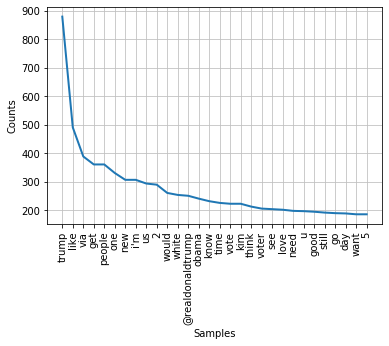

In [273]:
from matplotlib import pyplot as plt
fdist_tweet.plot(30)
plt.show()

In [274]:
top30 = list(fdist_tweet.most_common(30))
word30 = [t[0] for t in top30]
log30 = [np.log(t[1]) for t in top30]

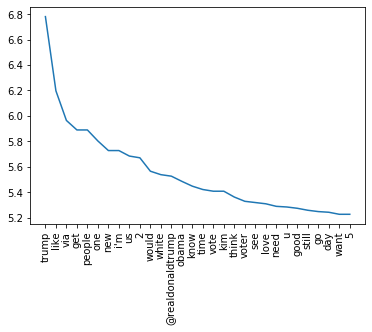

In [275]:
plt.plot(word30,log30)
plt.xticks(rotation=90)
plt.show()

In [276]:
from nltk import ngrams
n_grams = {}

for n in range(2,6):
    d_n = {}
    for t in tweets:
        grams = ngrams(t.split(), n)
        for g in grams:
            if g in d_n:
                d_n[g] = d_n[g]+1
            else:
                d_n[g] = 1
    n_grams[n] = d_n
        
    

In [277]:
len(n_grams[5])

76025

In [278]:
n_grams_chars = {}
for n in range(2,8):
    d_char = {}
    for b in tweets:
        grams = [b[i:i+n] for i in range(len(b)-n+1)]
        for g in grams:
            if g in d_char:
                d_char[g] = d_char[g]+1
            else:
                d_char[g] = 1
        n_grams_chars[n] = d_char

In [279]:
#n_grams_chars[2]

In [280]:
dev = open('./data/Gold/dev.txt').readlines()
devtest = open('./data/Gold/devtest.txt').readlines()
test = open('./data/Gold/test.txt').readlines()
train = open('./data/Gold/train.txt').readlines()


In [281]:
def remove_http(tweet):
    t = tweet.split(' ')
    temp = []
    for s in t:
        if "https://"  in s or "http://" in s or s.lower() in stop_words:
            continue
        else:
            temp.append(s.lower())
    return " ".join(temp)

def read_tweets(f):
    positive = []
    negative = []
    neutral = []
    tweets = []
    res = []
    for s in f:
        t = s.split('\t')
        t[2] = remove_http(t[2])
        if t[1] == "positive":
            positive.append(t[2])
        elif t[1] == "negative":
            negative.append(t[2])
        elif t[1] == "neutral":
            neutral.append(t[2])
        tweets.append(t[2])
        res.append(t[1])
    d = {}
    d["positive"] = positive
    d["negative"] = negative
    d["neutral"] = neutral
    return tweets,d,res

##dev_tweets, dev_tweets_dict,dev_res = read_tweets(dev)

In [282]:
dev_tweets, dev_tweets_dict, dev_res = read_tweets(dev)
devtest_tweets, devtest_tweets_dict, devtest_res = read_tweets(devtest)
test_tweets, test_tweets_dict, test_res = read_tweets(test)
train_tweets, train_tweets_dict, train_res = read_tweets(dev)

In [283]:
#dev_tweets_dict['positive']

In [284]:
tokens_dev_tweets = {}
tokens_devtest_tweets = {}
tokens_test_tweets = {}
tokens_train_tweets = {}

def process_list_tweets(tweets):
    res = []
    for tweet in tweets:
        tokens = TweetTokenizer().tokenize(tweet)
        tokens =  list(filter (lambda s:any([c.isalnum() for c in s]), tokens))
        tokens = [x.lower() for x in tokens]
        res.append(tokens)
    return res

tokens_dev_tweets['positive'] = process_list_tweets(dev_tweets_dict['positive'])
tokens_dev_tweets['negative'] = process_list_tweets(dev_tweets_dict['negative'])
tokens_dev_tweets['neutral'] = process_list_tweets(dev_tweets_dict['neutral'])

tokens_devtest_tweets['positive'] = process_list_tweets(devtest_tweets_dict['positive'])
tokens_devtest_tweets['negative'] = process_list_tweets(devtest_tweets_dict['negative'])
tokens_devtest_tweets['neutral'] = process_list_tweets(devtest_tweets_dict['neutral'])

tokens_test_tweets['positive'] = process_list_tweets(test_tweets_dict['positive'])
tokens_test_tweets['negative'] = process_list_tweets(test_tweets_dict['negative'])
tokens_test_tweets['neutral'] = process_list_tweets(test_tweets_dict['neutral'])

tokens_train_tweets['positive'] = process_list_tweets(train_tweets_dict['positive'])
tokens_train_tweets['negative'] = process_list_tweets(train_tweets_dict['negative'])
tokens_train_tweets['neutral'] = process_list_tweets(train_tweets_dict['neutral'])


In [285]:
tokens_gold_only = []
for att in tokens_dev_tweets:
    for tw in tokens_dev_tweets[att]:
        for tok in tw:
            if tok in tokens_gold_only or tok in tokens_tweet_url_punct_removed:
                continue
            else:
                tokens_gold_only.append(tok)
                

len(tokens_gold_only)

3170

In [286]:
for att in tokens_devtest_tweets:
    for tw in tokens_devtest_tweets[att]:
        for tok in tw:
            if tok in tokens_gold_only or tok in tokens_tweet_url_punct_removed:
                continue
            else:
                tokens_gold_only.append(tok)
                


In [287]:
for att in tokens_test_tweets:
    for tw in tokens_test_tweets[att]:
        for tok in tw:
            if tok in tokens_gold_only or tok in tokens_tweet_url_punct_removed:
                continue
            else:
                tokens_gold_only.append(tok)


In [227]:

for att in tokens_train_tweets:
    for tw in tokens_train_tweets[att]:
        for tok in tw:
            if tok in tokens_gold_only or tok in tokens_tweet_url_punct_removed:
                continue
            else:
                tokens_gold_only.append(tok)

In [228]:
len(tokens_gold_only)

26504

In [229]:
print("Training Positive: ", len(tokens_train_tweets['positive']))
print("Training Negative: ", len(tokens_train_tweets['negative']))
print("Training Neutral: ", len(tokens_train_tweets['neutral']))

Training Positive:  843
Training Negative:  391
Training Neutral:  765


In [230]:
positive_train = [item for sublist in tokens_train_tweets['positive'] for item in sublist]
freq_post_train = FreqDist(positive_train)

In [251]:
freq_post_train.most_common(30)

[('may', 138),
 ('tomorrow', 123),
 ('minecraft', 80),
 ("i'm", 69),
 ('pride', 68),
 ('parade', 66),
 ('seinfeld', 62),
 ('sunday', 61),
 ('snoop', 60),
 ('michael', 58),
 ('obama', 58),
 ('netflix', 58),
 ('nokia', 58),
 ('ric', 58),
 ('dogg', 58),
 ('jackson', 55),
 ('pope', 54),
 ('1st', 51),
 ('going', 51),
 ('serena', 51),
 ('nike', 49),
 ('time', 46),
 ('night', 45),
 ('one', 44),
 ('see', 43),
 ('make', 43),
 ('flair', 43),
 ('like', 42),
 ('nintendo', 42),
 ('oracle', 42)]

In [252]:
negative_train = [item for sublist in tokens_train_tweets['negative'] for item in sublist]
freq_nega_train = FreqDist(negative_train)
freq_nega_train.most_common(30)

[('may', 109),
 ('planned', 57),
 ('parenthood', 53),
 ('sarah', 52),
 ('obama', 51),
 ('palin', 50),
 ('rick', 44),
 ('perry', 41),
 ('1st', 40),
 ('scotus', 39),
 ('like', 37),
 ('monsanto', 36),
 ('tomorrow', 27),
 ('us', 22),
 ('one', 20),
 ('michelle', 19),
 ('think', 19),
 ('3rd', 19),
 ('make', 18),
 ('get', 18),
 ('amendment', 17),
 ('day', 16),
 ('time', 16),
 ('going', 16),
 ('would', 16),
 ('people', 15),
 ('sun', 15),
 ('it', 15),
 ('2nd', 14),
 ('still', 14)]

In [253]:
neutral_train = [item for sublist in tokens_train_tweets['neutral'] for item in sublist]
freq_neut_train = FreqDist(neutral_train)
freq_neut_train.most_common(30)

[('may', 150),
 ('tomorrow', 82),
 ('obama', 78),
 ('1st', 61),
 ('scotus', 59),
 ('time', 55),
 ('like', 51),
 ('monsanto', 47),
 ('nintendo', 47),
 ('oracle', 47),
 ('serena', 45),
 ('michelle', 43),
 ('palin', 43),
 ('sarah', 42),
 ("i'm", 41),
 ('nike', 41),
 ('2nd', 39),
 ('going', 38),
 ('sunday', 38),
 ('pope', 38),
 ('snoop', 38),
 ('ric', 37),
 ('rick', 37),
 ('3rd', 36),
 ('netflix', 36),
 ('michael', 34),
 ('jackson', 34),
 ('nokia', 34),
 ('pride', 33),
 ('parade', 33)]

In [234]:
##from 2-tools.ipynb
def separate_tokens_types(words):

    """
    Given a list of words from a corpus, separate the counts of tokens and
    types in time. Return the two lists.
    """

    t_d = {}
    tokens, types = [], []
    count = 0
    for i in range(len(words)):

        if words[i] not in t_d:
            count += 1
            t_d[words[i]] = 1

        tokens.append(i + 1)
        types.append(count)

    return tokens, types

gold_words = [t.split(' ') for t in dev_tweets]+[t.split(' ') for t in devtest_tweets]
gold_words = gold_words+[t.split(' ') for t in test_tweets]+[t.split(' ') for t in train_tweets]
gold_words = [item.lower() for sublist in gold_words for item in sublist if item.isalpha()]

In [235]:
len(gold_words)

222336

//anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


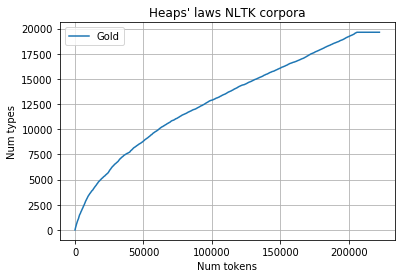

In [236]:
gold_tokens, gold_types = separate_tokens_types(gold_words)

plt.plot(gold_tokens, gold_types, label='Gold')

plt.grid()
plt.legend()
plt.title("Heaps' laws NLTK corpora")
plt.xlabel('Num tokens')
plt.ylabel('Num types')
plt.show()

In [237]:
import operator
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

vader_analyzer = SentimentIntensityAnalyzer()
vader_res = []
for sentence in test_tweets:
    vader_dict = vader_analyzer.polarity_scores(sentence)
    if vader_dict['compound'] >= 0.55 : 
        vader_res.append("positive") 
    elif vader_dict['compound'] <= - 0.55 : 
        vader_res.append("negative") 
    else : 
        vader_res.append("neutral")

In [238]:
correct = 0
for i in range(len(vader_res)):
    if vader_res[i] == test_res[i]:
        correct = correct + 1

correct/len(vader_res)

0.5907328421868941

In [239]:
positive_gold = [item for sublist in tokens_dev_tweets['positive'] for item in sublist]+[item for sublist in tokens_devtest_tweets['positive'] for item in sublist]+[item for sublist in tokens_test_tweets['positive'] for item in sublist]+[item for sublist in tokens_train_tweets['positive'] for item in sublist]
freq_post_gold = FreqDist(positive_dev)
negative_gold = [item for sublist in tokens_dev_tweets['negative'] for item in sublist]+[item for sublist in tokens_devtest_tweets['negative'] for item in sublist]+[item for sublist in tokens_test_tweets['negative'] for item in sublist]+[item for sublist in tokens_train_tweets['negative'] for item in sublist]
freq_nega_gold = FreqDist(negative_dev)
neutral_gold = [item for sublist in tokens_dev_tweets['neutral'] for item in sublist]+[item for sublist in tokens_devtest_tweets['neutral'] for item in sublist]+[item for sublist in tokens_test_tweets['neutral'] for item in sublist]+[item for sublist in tokens_train_tweets['neutral'] for item in sublist]
freq_neut_gold = FreqDist(neutral_dev)


In [240]:
#freq_post_gold.most_common(30)

In [241]:
#freq_nega_gold.most_common(30)

In [242]:
#freq_neut_gold.most_common(30)

In [243]:
##from https://towardsdatascience.com/creating-the-twitter-sentiment-analysis-program-in-python-with-naive-bayes-classification-672e5589a7ed
def extract_features(tweet):
    tweet_words = set(tweet)
    features = {}
    for word in word_features:
        features['contains(%s)' % word] = (word in tweet_words)
    return features


def naive_bayes_data_prepare(d):
    res = []
    for k in d:
        for t in d[k]:
            res.append((t,k))
    return res

def buildDict(d):
    res = []
    for k in d:
        token_list = [item for sublist in d[k] for item in sublist]
        freqs = FreqDist(token_list)
        res.extend(freqs.keys())
    return res

In [154]:
train_naive_bayes = naive_bayes_data_prepare(tokens_train_tweets)
test_naive_bayes = naive_bayes_data_prepare(tokens_test_tweets)
word_features = buildDict(tokens_train_tweets)

In [155]:
trainingFeatures=nltk.classify.apply_features(extract_features,train_naive_bayes)
NBayesClassifier=nltk.NaiveBayesClassifier.train(trainingFeatures)


In [156]:
NBResultLabels = [NBayesClassifier.classify(extract_features(tweet[0])) for tweet in test_naive_bayes]

In [157]:
correct_nb = 0
for i in range(len(NBResultLabels)):
    if NBResultLabels[i] == test_res[i]:
        correct_nb = correct_nb + 1

In [158]:
correct_nb/len(NBResultLabels)

0.3166583291645823

In [116]:
from nltk.classify.scikitlearn import SklearnClassifier
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [117]:
from sklearn.linear_model import LogisticRegression

In [120]:
LogisticRegression_classifier = SklearnClassifier(LogisticRegression())
LogisticRegression_classifier.train(trainingFeatures)
##lreg.train(process_list_tweets(dev_tweets), dev_res)

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


<SklearnClassifier(LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False))>

In [124]:
z

In [247]:
nltk_vader_res = []

analyzer = SentimentIntensityAnalyzer()
for sentence in test_tweets:
    vs = analyzer.polarity_scores(sentence)
    if vs['compound'] >= 0.45 : 
        nltk_vader_res.append("positive") 
    elif vs['compound'] <= - 0.45 : 
        nltk_vader_res.append("negative") 
    else : 
        nltk_vader_res.append("neutral")

correct = 0
for i in range(len(nltk_vader_res)):
    if nltk_vader_res[i] == test_res[i]:
        correct = correct + 1

correct/len(nltk_vader_res)

0.5911690577743312

In [248]:
from nltk.classify import NaiveBayesClassifier
from nltk.sentiment import SentimentAnalyzer

In [249]:
def features(tweet):
    return dict(('contains(%s)' % w, True) for w in tweet)

positive_featuresets = [(features(tweet),'positive') for tweet in tokens_dev_tweets['positive']]
negative_featuresets = [(features(tweet),'negative') for tweet in tokens_dev_tweets['negative']]
neutral_featuresets = [(features(tweet),'neutral') for tweet in tokens_dev_tweets['neutral']]
training_features = positive_featuresets + negative_featuresets + neutral_featuresets

In [250]:
sentiment_analyzer = SentimentAnalyzer()
trainer = NaiveBayesClassifier.train
classifier = sentiment_analyzer.train(trainer, training_features)


Training classifier
